Simple RandomForest

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import os

In [2]:
data_path = '/home/hari/Downloads/Sepsis/Data/A'


In [3]:
patient_id = sorted(os.listdir(data_path))

In [7]:
len_train = round(0.7*len(patient_id))+1
len_val = round(0.15*len(patient_id))
len_test = round(0.15*len(patient_id))
len_train + len_val + len_test == len(patient_id)

True

In [8]:
import random
train_id = random.sample(patient_id, len_train)
val_id = random.sample(set(patient_id) - set(train_id), len_val)
test_id = set(patient_id) - set(train_id) - set(val_id)

In [4]:
import pickle

# with open('/home/hari/Downloads/Sepsis/ProcessedData/A_ids.pickle', 'wb') as f:
#     pickle.dump([train_id, val_id, test_id], f)
with open('/home/hari/Downloads/Sepsis/ProcessedData/A_ids.pickle', 'rb') as f:
    [train_id, val_id, test_id] = pickle.load(f)

In [5]:
data_train = '/home/hari/Downloads/Sepsis/ProcessedData/training/'
data_val = '/home/hari/Downloads/Sepsis/ProcessedData/validation/'
data_test = '/home/hari/Downloads/Sepsis/ProcessedData/test/'

In [12]:
i = 1
for p in train_id:
    if i % 100 == 0:
        print(i, len(train_id))
    i = i + 1
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    df['patient_id'] = int(p[1:7])
    if "traindf" not in locals():
      traindf = df
    else:
      traindf = traindf.append(df)

10 14236
20 14236
30 14236
40 14236
50 14236
60 14236
70 14236
80 14236
90 14236
100 14236
110 14236
120 14236
130 14236
140 14236
150 14236
160 14236
170 14236
180 14236
190 14236
200 14236
210 14236
220 14236
230 14236
240 14236
250 14236
260 14236
270 14236
280 14236
290 14236
300 14236
310 14236
320 14236
330 14236
340 14236
350 14236
360 14236
370 14236
380 14236
390 14236
400 14236
410 14236
420 14236
430 14236
440 14236
450 14236
460 14236
470 14236
480 14236
490 14236
500 14236
510 14236
520 14236
530 14236
540 14236
550 14236
560 14236
570 14236
580 14236
590 14236
600 14236
610 14236
620 14236
630 14236
640 14236
650 14236
660 14236
670 14236
680 14236
690 14236
700 14236
710 14236
720 14236
730 14236
740 14236
750 14236
760 14236
770 14236
780 14236
790 14236
800 14236
810 14236
820 14236
830 14236
840 14236
850 14236
860 14236
870 14236
880 14236
890 14236
900 14236
910 14236
920 14236
930 14236
940 14236
950 14236
960 14236
970 14236
980 14236
990 14236
1000 14236
1010 142

In [13]:
i = 1
for p in val_id:
    if i % 100 == 0:
        print(i, len(val_id))
    i = i + 1
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    df['patient_id'] = int(p[1:7])
    if "valdf" not in locals():
      valdf = df
    else:
      valdf = valdf.append(df)

100 3050
200 3050
300 3050
400 3050
500 3050
600 3050
700 3050
800 3050
900 3050
1000 3050
1100 3050
1200 3050
1300 3050
1400 3050
1500 3050
1600 3050
1700 3050
1800 3050
1900 3050
2000 3050
2100 3050
2200 3050
2300 3050
2400 3050
2500 3050
2600 3050
2700 3050
2800 3050
2900 3050
3000 3050


In [14]:
i = 1
for p in test_id:
    if i % 100 == 0:
        print(i, len(test_id))
    i = i + 1
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    df['patient_id'] = int(p[1:7])
    if "testdf" not in locals():
      testdf = df
    else:
      testdf = testdf.append(df)

100 3050
200 3050
300 3050
400 3050
500 3050
600 3050
700 3050
800 3050
900 3050
1000 3050
1100 3050
1200 3050
1300 3050
1400 3050
1500 3050
1600 3050
1700 3050
1800 3050
1900 3050
2000 3050
2100 3050
2200 3050
2300 3050
2400 3050
2500 3050
2600 3050
2700 3050
2800 3050
2900 3050
3000 3050


In [6]:
# with open('/home/hari/Downloads/Sepsis/ProcessedData/A_whole.pickle', 'wb') as f:
#     pickle.dump([traindf, valdf, testdf], f)

with open('/home/hari/Downloads/Sepsis/ProcessedData/A_whole.pickle', 'rb') as f:
    [traindf, valdf, testdf] = pickle.load(f)

In [7]:
X_feature = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
       'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total',
       'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets',
       'Age', 'Gender', 'HospAdmTime', 'ICULOS']
y_feature = 'SepsisLabel'

In [8]:
X_train = traindf[X_feature]
y_train = traindf[y_feature]
X_val = valdf[X_feature]
y_val = valdf[y_feature]
X_test = testdf[X_feature]
y_test = testdf[y_feature]

In [9]:
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [10]:
# list out lab test features for imputation
labs=['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

# list out vital signal features for imputation
vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

# list out demographic features for imputation
demogs = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

# labels
labels = ['SepsisLabel']


In [11]:
labs_df = traindf[labs]
vitals_df = traindf[vitals]
demogs_df = traindf[demogs]

In [12]:
import missingno as msno

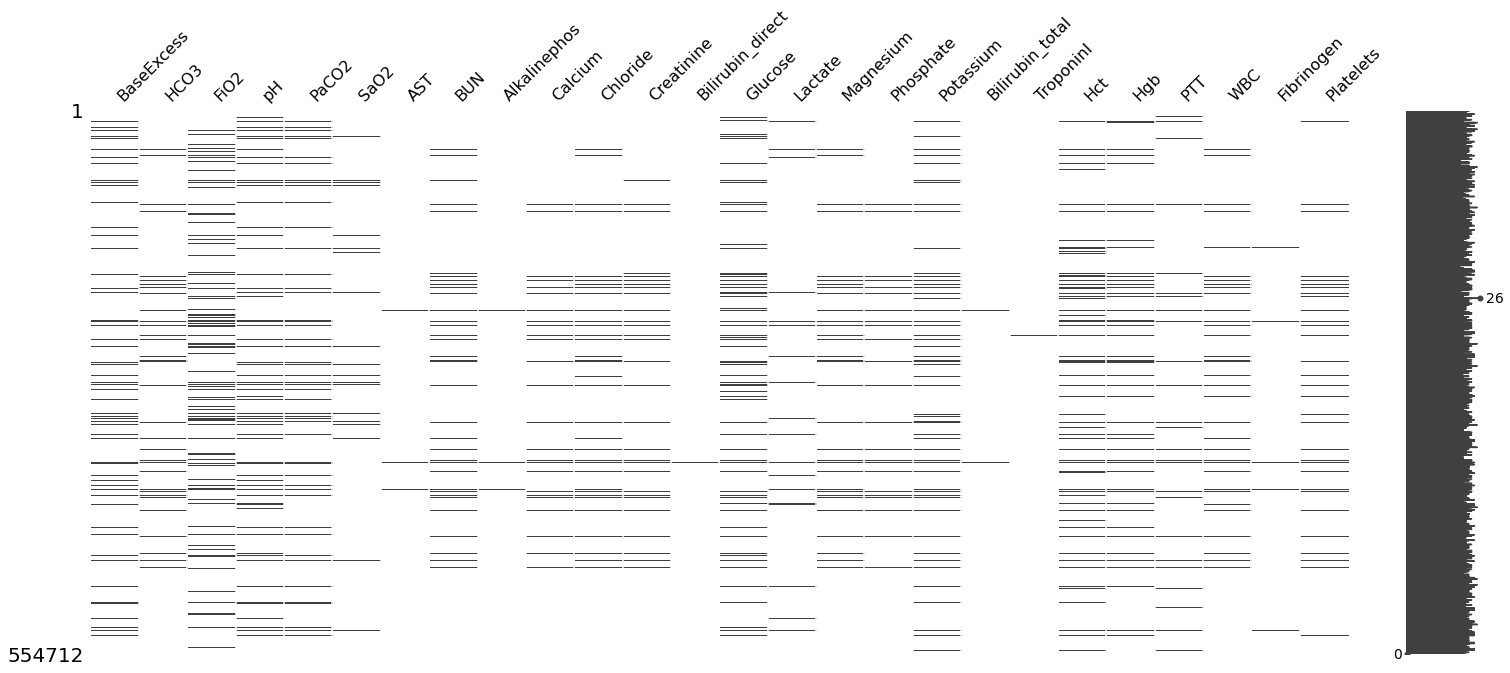

In [13]:
msno.matrix(labs_df)


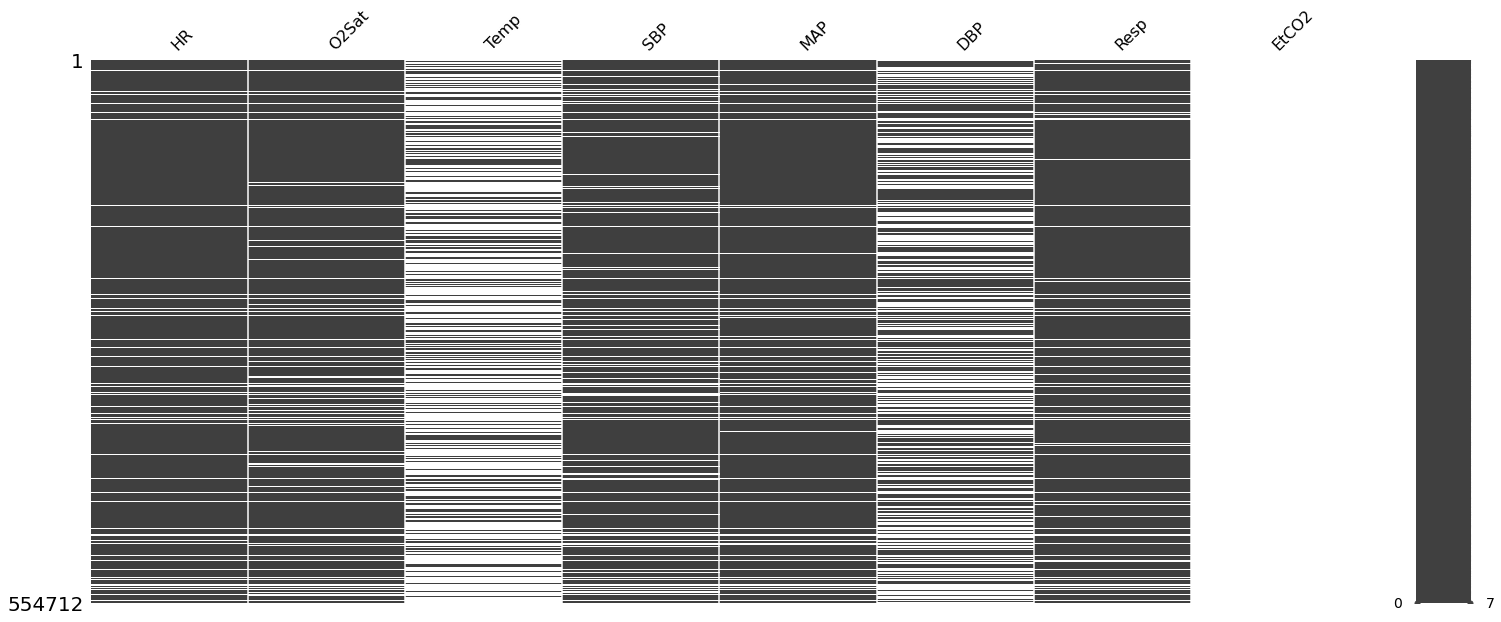

In [14]:
msno.matrix(vitals_df)

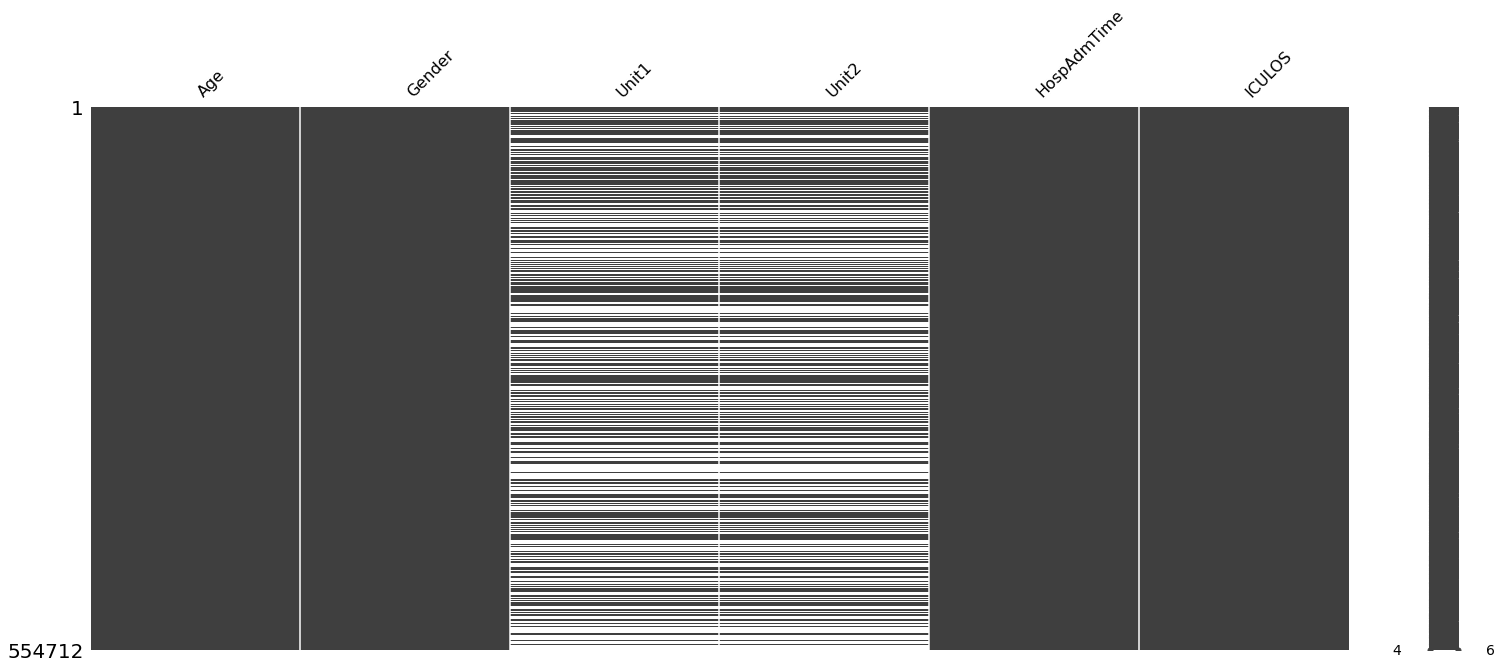

In [15]:
msno.matrix(demogs_df)

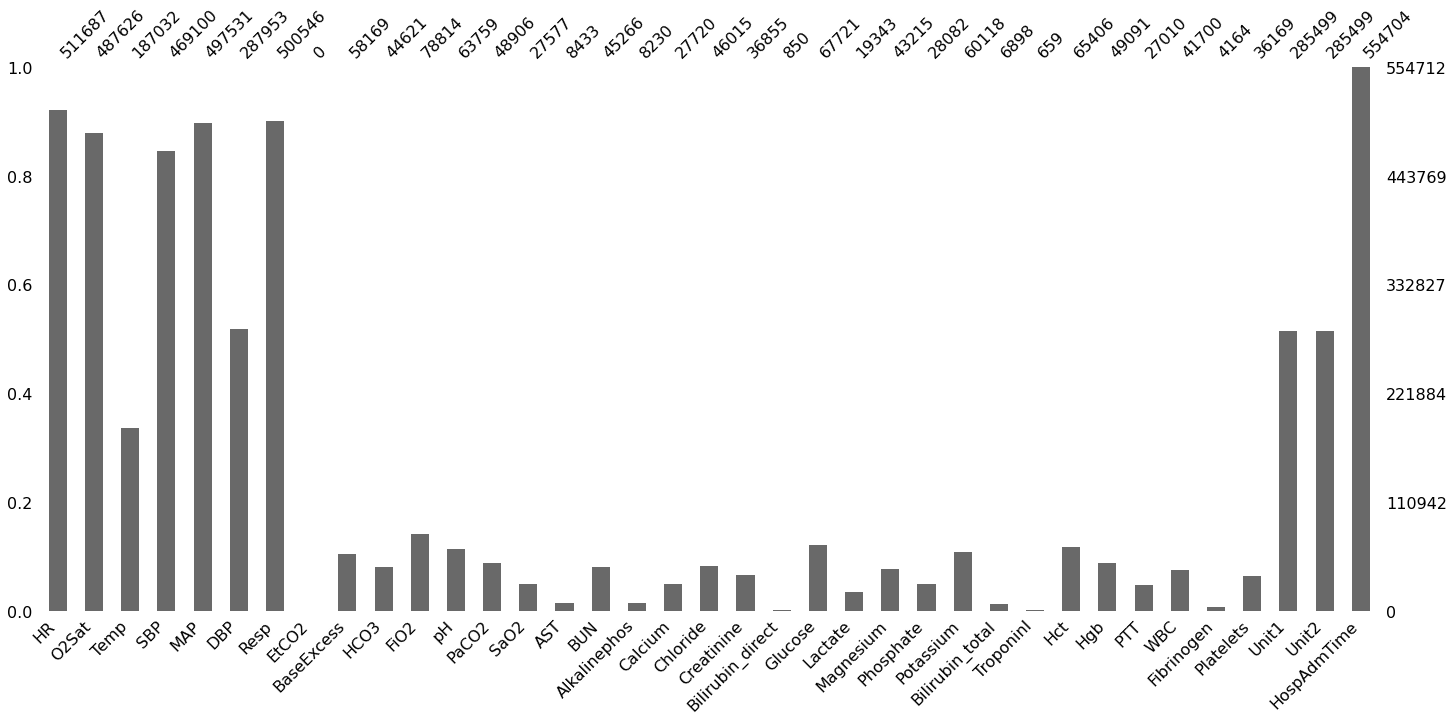

In [16]:
missingdata_df = traindf.columns[traindf.isnull().any()].tolist()
msno.bar(traindf[missingdata_df], log=False)

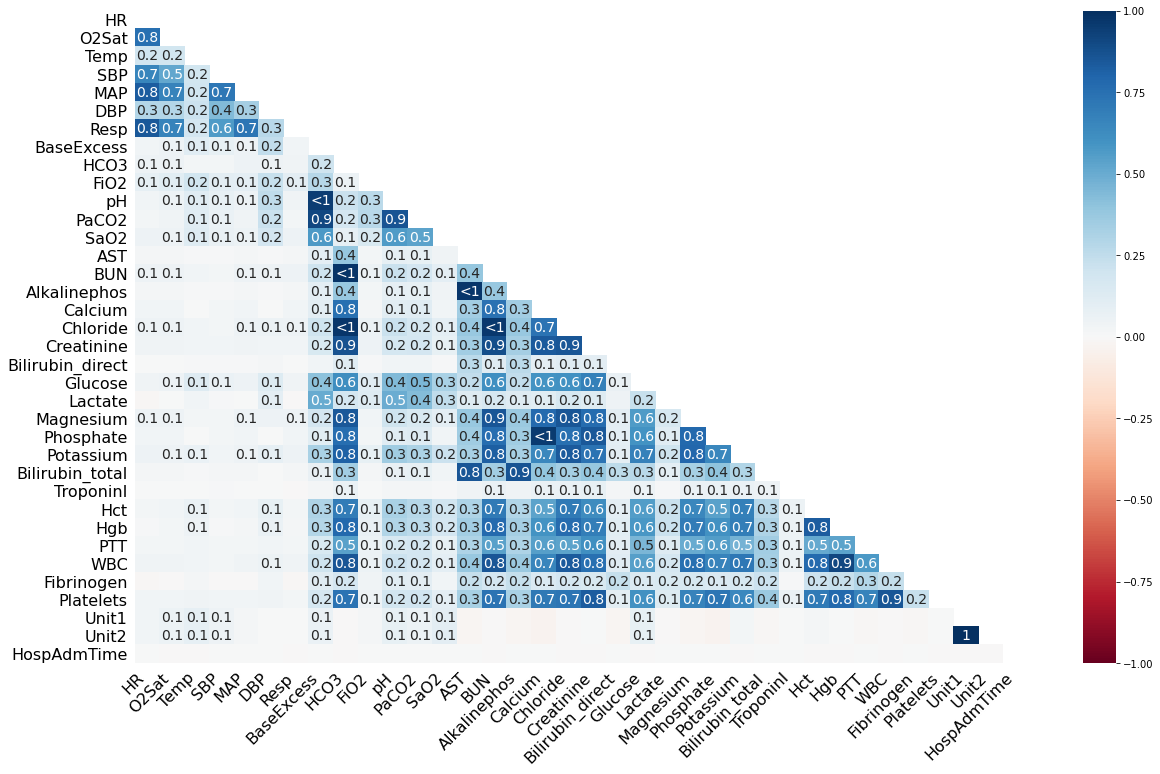

In [17]:
msno.heatmap(traindf[missingdata_df])

In [18]:
def impute_missing_vals(df, attributes):

    """
    function that imputes missing values.

    @param df: dataframe that has missing values to be
               imputed
           attributes: list of String, attributes of dataframe
    @return df_clean: dataframe without missing values

    """

    """
    fill missing values by the closest values first
    ffill to fill missing values in the tail
    bfill to fill missing values in the head
    """
    # copy df
    df_clean = df.copy()
    for att in attributes:
        if df_clean[att].isnull().sum() == len(df_clean):
            df_clean[att] = df_clean[att].fillna(0)
        elif df_clean[att].isnull().sum() == len(df_clean) - 1:
            df_clean[att] = df_clean[att].ffill().bfill()
        elif df_clean[att].isnull().sum() == 0:
            df_clean[att] = df_clean[att]
        else:
            df_clean[att] = df_clean[att].interpolate(method='nearest', limit_direction='both')
            df_clean[att] = df_clean[att].ffill().bfill()

    return df_clean

In [19]:
X_train = impute_missing_vals(X_train, X_train.columns)
X_test = impute_missing_vals(X_test, X_train.columns)
X_val = impute_missing_vals(X_val, X_train.columns)


In [20]:
best = RandomForestClassifier(random_state=123, max_depth=20, n_estimators=100, class_weight='balanced_subsample')
best.fit(X_train,y_train)

y_pred_best = best.predict(X_val)
y_pred_proba_best = best.predict_proba(X_val)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_val, y_pred_proba_best)
auc_best = auc(recall_best, precision_best)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)
auroc = auc(fpr, tpr)

print(classification_report(y_val, y_pred_best))
print('F1 score:', f1_score(y_val,y_pred_best))
print('Precision:', precision_score(y_val,y_pred_best))
print('Recall:', recall_score(y_val,y_pred_best))
print('AUPRC:', auc_best)
print('AUC:', auroc)
print('Accuracy:', accuracy_score(y_val,y_pred_best))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    114839
           1       0.15      0.02      0.03      2523

    accuracy                           0.98    117362
   macro avg       0.56      0.51      0.51    117362
weighted avg       0.96      0.98      0.97    117362

F1 score: 0.03312191684284708
Precision: 0.1492063492063492
Recall: 0.0186286167261197
AUPRC: 0.07364362640757333
AUC: 0.6749401582557133
Accuracy: 0.9766193486818562


Simple RNN

In [26]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden